# Classification of Pumpkin Seeds

In [2]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data
data = pd.read_csv('dataset/pumpkin_seeds.csv', encoding='latin1')

## Section 1: Introduction
(Possible problem statement)
In the agricultural industry, the ability to classify pumpkin seeds by type is essential for efficient seed sorting, quality control, and market distribution. Accurate seed type identification allows farmers and distributors to ensure that the seeds meet specific requirements for growth, yield, and commercial viability.

In this project, we aim to develop a machine learning model to classify pumpkin seeds into two primary types: Cercevelik and Urgup Sivrisi. Using a dataset that includes various morphological features of the seeds—such as area, perimeter, axis lengths, compactness, and eccentricity—we will explore, preprocess, and analyze the data to build a robust classification model. This model should be able to accurately predict the type of a pumpkin seed based on its physical characteristics, providing a valuable tool for farmers and agricultural businesses to streamline the sorting and distribution process.

## Section 2: Description of the dataset

In [4]:
print(data.dtypes)

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object


In [5]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik


| Attribute             | Description                                                                                           | Data Type |
|-----------------------|-------------------------------------------------------------------------------------------------------|-----------|
| **Area**              | Number of pixels within the borders of a pumpkin seed                                                 | int64     |
| **Perimeter**         | Circumference in pixels of a pumpkin seed                                                             | float64   |
| **Major_Axis_Length** | Large axis distance of a pumpkin seed                                                                 | float64   |
| **Minor_Axis_Length** | Small axis distance of a pumpkin seed                                                                 | float64   |
| **Convex_Area**       | Number of pixels of the smallest convex shell at the region formed by the pumpkin seed                | int64     |
| **Equiv_Diameter**    | Computed as $\sqrt{\frac{4a}{\pi}}$, where $a$ is the area of the pumpkin seed                                 | float64   |
| **Eccentricity**      | Eccentricity of a pumpkin seed                                                                        | float64   |
| **Solidity**          | Convex condition of the pumpkin seeds                                                                 | float64   |
| **Extent**            | Ratio of a pumpkin seed area to the bounding box pixels                                               | float64   |
| **Roundness**         | Ovality of pumpkin seeds without considering the distortion of the edges                              | float64   |
| **Aspect_Ratio**      | Aspect ratio of the pumpkin seeds                                                                     | float64   |
| **Compactness**       | Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference | float64 |
| **Class**             | Seed type, either Cercevelik or Urgup Sivrisi                                                         | object    |


## Section 3: List of dependencies

## Section 4: Data preprocessing and cleaning

In [6]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik


Clean the class as it cannot display special characters

In [7]:
print(data['Class'].unique())

['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


In [8]:
data['Class'] = data['Class'].replace({'\x82er\x8develik': 'Cercevelik'})
data['Class'] = data['Class'].replace({'\x86rg\x9fp Sivrisi': 'Sivrisi'})

print(data['Class'].unique())

['Cercevelik' 'Sivrisi']


Replace Cercevelik = 0, Sivrisi = 1 for the model to interpret

In [10]:
data['Class'] = data['Class'].replace({'Cercevelik' : 0})
data['Class'] = data['Class'].replace({'Sivrisi': 1})

/var/folders/mj/dky4sh213kg8fbtndn6tv3f80000gn/T/ipykernel_21819/1068633064.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Class'] = data['Class'].replace({'Sivrisi': 1})


Now we check if there are nulls in the dataset

In [12]:
print(data.isnull().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


## Section 5: Exploratory Data Analysis

Use a heatmap to check relationships between features

<Axes: >

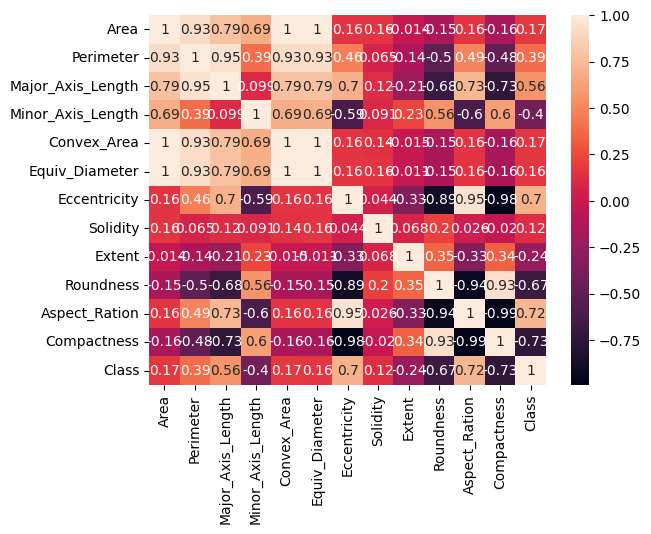

In [11]:
corr_matrix =  data.corr()
sns.heatmap(corr_matrix, annot=True)

## Section 6. Initial model training


### K-Nearest Neightbors (KNN)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[905 144]
 [240 711]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1049
           1       0.83      0.75      0.79       951

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

[[184  67]
 [117 132]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.67       251
           1       0.66      0.53      0.59       249

    accuracy                           0.63       500
   macro avg       0.64      0.63      0.63       500
weighted avg       0.64      0.63      0.63       500



### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_train = log_reg.predict(X_train)

# Evaluate the model
print(confusion_matrix(y_train, y_pred_log_reg_train))
print(classification_report(y_train, y_pred_log_reg_train))

print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[970  79]
 [147 804]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1049
           1       0.91      0.85      0.88       951

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

[[226  25]
 [ 44 205]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       251
           1       0.89      0.82      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



### Neural Networks (NN)

In [17]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp_train = mlp.predict(X_train)

# Evaluate the model
print(confusion_matrix(y_train, y_pred_mlp_train))
print(classification_report(y_train, y_pred_mlp_train))

print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[ 85 964]
 [178 773]]
              precision    recall  f1-score   support

           0       0.32      0.08      0.13      1049
           1       0.45      0.81      0.58       951

    accuracy                           0.43      2000
   macro avg       0.38      0.45      0.35      2000
weighted avg       0.38      0.43      0.34      2000

[[ 15 236]
 [ 40 209]]
              precision    recall  f1-score   support

           0       0.27      0.06      0.10       251
           1       0.47      0.84      0.60       249

    accuracy                           0.45       500
   macro avg       0.37      0.45      0.35       500
weighted avg       0.37      0.45      0.35       500

